In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
km_5 = KMeans(n_clusters = 5, algorithm='elkan',n_init=10) # 5簇

In [3]:
df = pd.read_excel('农业数据_处理后.xlsx')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df_no2_all = df.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values
df_no2_all = pd.DataFrame(df_no2_all)

df_no2_th = df.loc[:, ['temperature','humidity']].values
df_no2_th = pd.DataFrame(df_no2_th)

df_no2_pr = df.loc[:, ['ph','rainfall']].values
df_no2_pr = pd.DataFrame(df_no2_pr)

df_no2_npk = df.loc[:, ['N','P','K']].values
df_no2_npk = pd.DataFrame(df_no2_npk)

df_labels = df['label']

## 属性列注明
df_no2 = {

    0 = N
    1 = P
    2 = K
    3 = temperature
    4 = humidity
    5 = ph
    6 = rainfall
}

In [5]:
# 变量释义：
# df_no2_7：对处理后的数据集中7个属性列做表      df_labels：df此表的label属性   df_no2_7_result：仅含分簇结果和label列
# cluster_labels_dict：字典，存储分簇结果  Cluster_contain_labels：列表，用于存储出现在各分簇结果的label，无重复值
# counts：Pandas Series，用于存储当前循环簇的label数量    d：df,从counts将符合条件的label计入（临时变量，无记忆）
# missing_labels：存储缺失的未满足第一条件的label         missing_label_counts：嵌套字典的外层字典  cluster_count：嵌套字典的内层字典
# cluster_key：cluster_count的键（临时变量，无记忆）      count：满足条件的总行数（临时变量，无记忆）     

# 对7个指标一起聚类
df_no2_7 = km_5.fit_predict(df_no2_all)
df_no2_7 = pd.DataFrame(df_no2_7)
df_no2_7_result = pd.concat([df_no2_7, df_labels], axis = 1)
df_no2_7_result = df_no2_7_result.rename(columns = {0: 'cluster'})

# 初始化
cluster_labels_dict = {}
Cluster_contain_labels = []

total_counts = df_no2_7_result['label'].value_counts()
threshold = total_counts * 0.649

for i in range(5):
    counts = df_no2_7_result[df_no2_7_result['cluster'] == i]['label'].value_counts()
    d = df_no2_7_result.loc[df_no2_7_result['label'].isin(counts.index[counts > threshold[counts.index]])]
    d = d['label'].value_counts()
    cluster_labels_dict[f'Cluster {i+1}'] = list(d.index)
    
    # 将新的标签添加到 Cluster_contain_labels 列表中
    for label in d.index:
        if label not in Cluster_contain_labels:
            Cluster_contain_labels.append(label)


# 检查是否存在label遗漏
missing_labels = set(df_labels) - set(Cluster_contain_labels)

# 对遗漏的label操作
missing_label_counts = {}

for missing_label in missing_labels:
    cluster_count = {}
    
    for i in range(5):
        cluster_key = f'Cluster {i+1}'
        cluster_count[cluster_key] = 0
    missing_label_counts[missing_label] = cluster_count

for missing_label in missing_labels:
    for i in range(5):
        count = df_no2_7_result[(df_no2_7_result['cluster'] == i) & (df_no2_7_result['label'] == missing_label)].shape[0]
        missing_label_counts[missing_label][f'Cluster {i+1}'] = count

missing_label_max = {
    label: max(counts, key=counts.get)
    for label, counts in missing_label_counts.items()
}

for label, cluster in missing_label_max.items():
    if label not in cluster_labels_dict[cluster]:
        cluster_labels_dict[cluster].append(label)

cluster_labels_dict

{'Cluster 1': ['mungbean',
  'chickpea',
  'lentil',
  'mothbeans',
  'kidneybeans',
  'blackgram'],
 'Cluster 2': ['rice', 'jute', 'coffee', 'papaya', 'pigeonpeas'],
 'Cluster 3': ['grapes', 'apple'],
 'Cluster 4': ['cotton', 'maize', 'watermelon', 'banana', 'muskmelon'],
 'Cluster 5': ['pomegranate', 'mango', 'orange', 'coconut']}

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


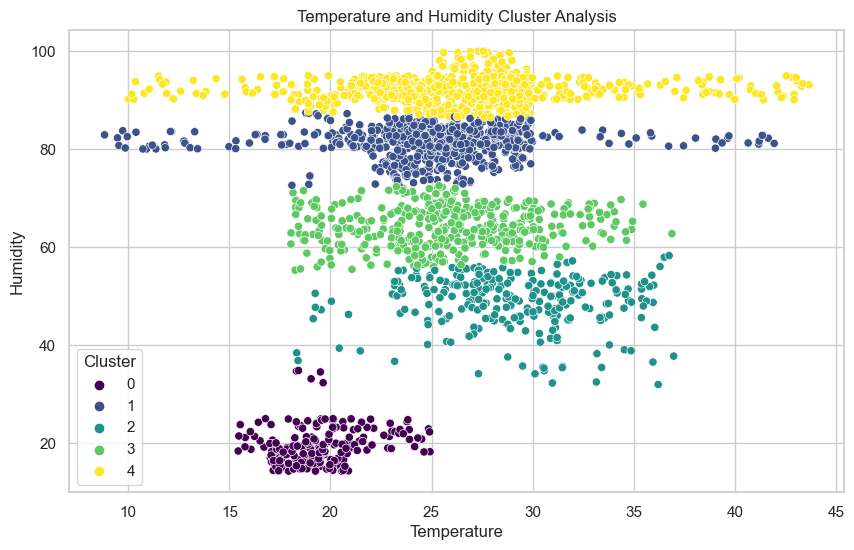

In [6]:
# 对temperature和humidity指标聚类
km_5 = KMeans(n_clusters = 5, algorithm='elkan',random_state = 2) 
df_no2_2_th = km_5.fit_predict(df_no2_th)
df_no2_2_th = pd.DataFrame(df_no2_2_th)
df_no2_2_th = df_no2_2_th.rename(columns = {0: 'cluster'})
df_no2_2_th_result = pd.concat([df_no2_th,df_no2_2_th, df_labels], axis = 1)

# 初始化
cluster_labels_dict = {}
Cluster_contain_labels = []

total_counts = df_no2_2_th_result['label'].value_counts()
threshold = total_counts * 0.55

for i in range(5):
    counts = df_no2_2_th_result[df_no2_2_th_result['cluster'] == i]['label'].value_counts()
    d = df_no2_2_th_result.loc[df_no2_2_th_result['label'].isin(counts.index[counts >= threshold[counts.index]])]
    d = d['label'].value_counts()
    cluster_labels_dict[f'Cluster {i+1}'] = list(d.index)
    
    # 将新的标签添加到 Cluster_contain_labels 列表中
    for label in d.index:
        if label not in Cluster_contain_labels:
            Cluster_contain_labels.append(label)

# 设置绘图样式
sns.set(style="whitegrid")

# 创建一个散点图，其中x为温度，y为湿度，hue为簇标签
plt.figure(figsize=(10, 6))
sns.scatterplot(x=0, y=1, hue="cluster", data=df_no2_2_th_result, palette="viridis")

# 添加标题和轴标签
plt.title("Temperature and Humidity Cluster Analysis")
plt.xlabel("Temperature")
plt.ylabel("Humidity")

# 显示图例
plt.legend(title='Cluster')

plt.savefig('Temperature and Humidity Cluster Analysis.png')
# 显示图表
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


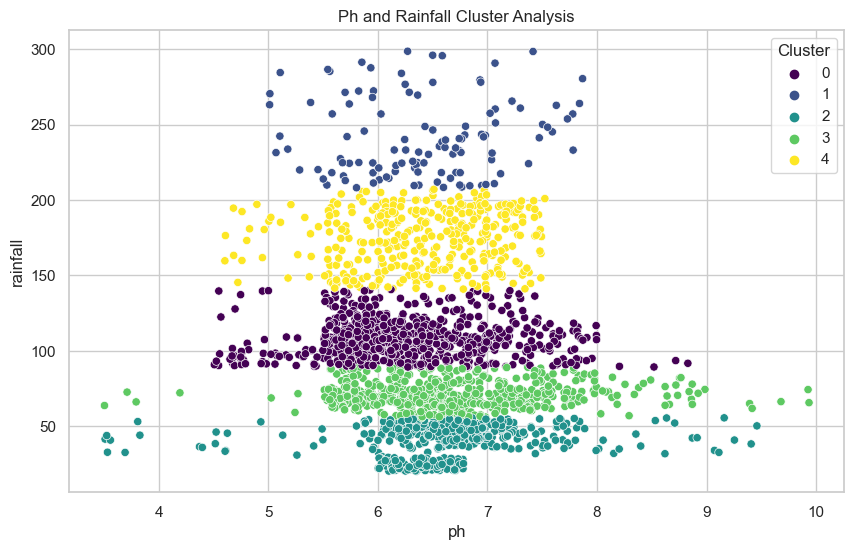

In [7]:
# 对ph和rainfall指标聚类
df_no2_2_pr = km_5.fit_predict(df_no2_pr)
df_no2_2_pr = pd.DataFrame(df_no2_2_pr)
df_no2_2_pr = df_no2_2_pr.rename(columns = {0: 'cluster'})
df_no2_2_pr_result = pd.concat([df_no2_pr,df_no2_2_pr, df_labels], axis = 1)

# 初始化
cluster_labels_dict = {}
Cluster_contain_labels = []

total_counts = df_no2_2_pr_result['label'].value_counts()
threshold = total_counts * 0.58

for i in range(5):
    counts = df_no2_2_pr_result[df_no2_2_pr_result['cluster'] == i]['label'].value_counts()
    d = df_no2_2_pr_result.loc[df_no2_2_pr_result['label'].isin(counts.index[counts >= threshold[counts.index]])]
    d = d['label'].value_counts()
    cluster_labels_dict[f'Cluster {i+1}'] = list(d.index)
    
    # 将新的标签添加到 Cluster_contain_labels 列表中
    for label in d.index:
        if label not in Cluster_contain_labels:
            Cluster_contain_labels.append(label)

# 检查是否存在label遗漏
missing_labels = set(df_labels) - set(Cluster_contain_labels)

# 对遗漏的label操作
missing_label_counts = {}

for missing_label in missing_labels:
    cluster_count = {}
    
    for i in range(5):
        cluster_key = f'Cluster {i+1}'
        cluster_count[cluster_key] = 0
    missing_label_counts[missing_label] = cluster_count

for missing_label in missing_labels:
    for i in range(5):
        count = df_no2_2_pr_result[(df_no2_2_pr_result['cluster'] == i) & (df_no2_2_pr_result['label'] == missing_label)].shape[0]
        missing_label_counts[missing_label][f'Cluster {i+1}'] = count

missing_label_max = {
    label: max(counts, key=counts.get)
    for label, counts in missing_label_counts.items()
}

for label, cluster in missing_label_max.items():
    if label not in cluster_labels_dict[cluster]:
        cluster_labels_dict[cluster].append(label)

# 设置绘图样式
sns.set(style="whitegrid")

# 创建一个散点图，其中x为温度，y为湿度，hue为簇标签
plt.figure(figsize=(10, 6))
sns.scatterplot(x=0, y=1, hue="cluster", data=df_no2_2_pr_result, palette="viridis")

# 添加标题和轴标签
plt.title("Ph and Rainfall Cluster Analysis")
plt.xlabel("ph")
plt.ylabel("rainfall")

# 显示图例
plt.legend(title='Cluster')

plt.savefig('Ph and Rainfall Cluster Analysis.png')
# 显示图表
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


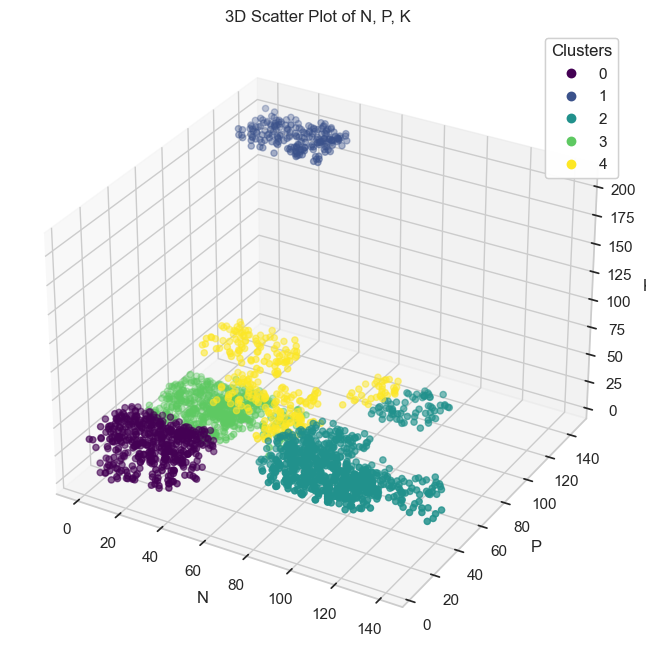

In [8]:
# 对N、P、K指标聚类
df_no2_3_npk = km_5.fit_predict(df_no2_npk)
df_no2_3_npk = pd.DataFrame(df_no2_3_npk)
df_no2_3_npk = df_no2_3_npk.rename(columns = {0: 'cluster'})
df_no2_3_npk_result = pd.concat([df_no2_npk,df_no2_3_npk, df_labels], axis = 1)

# 初始化
cluster_labels_dict = {}
Cluster_contain_labels = []

total_counts = df_no2_3_npk_result['label'].value_counts()
threshold = total_counts * 0.646

for i in range(5):
    counts = df_no2_3_npk_result[df_no2_3_npk_result['cluster'] == i]['label'].value_counts()
    d = df_no2_3_npk_result.loc[df_no2_3_npk_result['label'].isin(counts.index[counts >= threshold[counts.index]])]
    d = d['label'].value_counts()
    cluster_labels_dict[f'Cluster {i+1}'] = list(d.index)
    
    # 将新的标签添加到 Cluster_contain_labels 列表中
    for label in d.index:
        if label not in Cluster_contain_labels:
            Cluster_contain_labels.append(label)

# 检查是否存在label遗漏
missing_labels = set(df_labels) - set(Cluster_contain_labels)

# 对遗漏的label操作
missing_label_counts = {}

for missing_label in missing_labels:
    cluster_count = {}
    
    for i in range(5):
        cluster_key = f'Cluster {i+1}'
        cluster_count[cluster_key] = 0
    missing_label_counts[missing_label] = cluster_count

for missing_label in missing_labels:
    for i in range(5):
        count = df_no2_3_npk_result[(df_no2_3_npk_result['cluster'] == i) & (df_no2_3_npk_result['label'] == missing_label)].shape[0]
        missing_label_counts[missing_label][f'Cluster {i+1}'] = count

missing_label_max = {
    label: max(counts, key=counts.get)
    for label, counts in missing_label_counts.items()
}

for label, cluster in missing_label_max.items():
    if label not in cluster_labels_dict[cluster]:
        cluster_labels_dict[cluster].append(label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，这里假设N、P、K的列名分别为'N', 'P', 'K'
scatter = ax.scatter(df_no2_3_npk_result[0], df_no2_3_npk_result[1], df_no2_3_npk_result[2], 
                     c=df_no2_3_npk_result['cluster'], cmap='viridis')

# 添加图例
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# 添加坐标轴标签
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')

# 添加标题
plt.title('3D Scatter Plot of N, P, K')


plt.savefig('3D Scatter Plot of N, P, K.png')
# 显示图表
plt.show()